In [ ]:
from plot_nice import MultiModalRegressionTransformerWithWeights
from model.decoder import MultiModalRegressionTransformer
import torch
original_model = MultiModalRegressionTransformer(384, 26, 128, 28, 6, 32, 2, 0)
original_model.load_state_dict(torch.load('val_loss0.1097_DPR_0.1_MP_0.5_DM_128_TL_2_heads_32.pth'))




#MultiModalRegressionTransformerWithWeights()

<All keys matched successfully>

In [ ]:
from plot_nice import create_modified_model_from_original, save_attention_weights, plot_attention_heads_comparison, plot_attention_comparison
modified_model = create_modified_model_from_original(original_model, 'all')
from model.dataset import load_dataset
from model.config import COLUMN_DICT, MAX_SEQUENCE_LENGTH, TOKEN_TYPE_VOCAB
from model.collate import create_collate_fn
from torch.utils.data import DataLoader

data_path = 'shuffle_test_cat.csv'

dataset, chemberta_dimension = load_dataset(data_path, COLUMN_DICT, MAX_SEQUENCE_LENGTH)
    
    # Create collate function
configured_collate_fn = create_collate_fn(TOKEN_TYPE_VOCAB, 0)
    
    # Create DataLoader
dataloader = DataLoader(
    dataset, 
    batch_size=1, 
    shuffle=False,  # Usually no shuffling for inference
    collate_fn=configured_collate_fn
)




Data loaded from shuffle_test_cat.csv. Shape: (1425, 26)
ChemBERTa loaded successfully with hidden size: 384


dict_keys(['SMILES_fps', 'word_tokens_ref', 'values_ref', 'token_type_ids', 'attention_mask', 'masked_lm_labels', 'token_type_vocab'])
Attention weights saved to attention_weights/
Layers captured: ['layer_0', 'layer_1']
  layer_0 shape: (1, 32, 28, 28)
    - Batch size: 1
    - Number of heads: 32
    - Sequence length: 28 x 28
  layer_1 shape: (1, 32, 28, 28)
    - Batch size: 1
    - Number of heads: 32
    - Sequence length: 28 x 28


/opt/conda/envs/ddfp/lib/python3.10/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


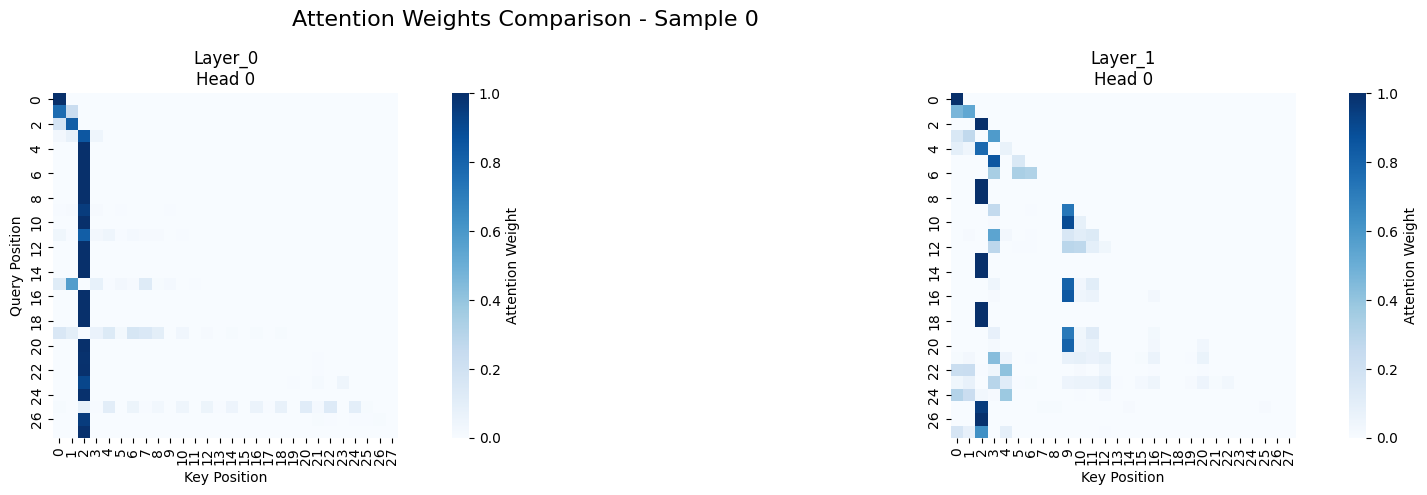

In [39]:
for index, batch in enumerate(dataloader):
    if index == 51:
        sample_input = batch
sample_input['token_type_vocab'] = TOKEN_TYPE_VOCAB
print(sample_input.keys())

attention_weights = save_attention_weights(modified_model, sample_input)

plot_attention_comparison(attention_weights, layers_to_compare=['layer_0', 'layer_1'])

In [ ]:
from plot_nice import MultiModalRegressionTransformerWithWeights
from models import MultiModalRegressionTransformer
import torch
FP_model = MultiModalRegressionTransformer(384, 26, 128, 28, 6, 32, 2, 0)
FP_model.load_state_dict(torch.load('FP_val_loss_0.0023_DR_0.15_DM_16_HD_2_FPD_128_FPL_2_FPH_32.pth'))




#MultiModalRegressionTransformerWithWeights()

In [ ]:
from plot_nice import create_modified_model_from_original, save_attention_weights, plot_attention_heads_comparison, plot_attention_comparison
modified_model = create_modified_model_from_original(FP_model, 'all')
from dataset import load_dataset
from config import COLUMN_DICT, MAX_SEQUENCE_LENGTH, TOKEN_TYPE_VOCAB
from collate import create_collate_fn
from torch.utils.data import DataLoader

data_path = 'shuffle_test_cat.csv'

dataset, chemberta_dimension = load_dataset(data_path, COLUMN_DICT, MAX_SEQUENCE_LENGTH)
    
    # Create collate function
configured_collate_fn = create_collate_fn(TOKEN_TYPE_VOCAB, 0)
    
    # Create DataLoader
dataloader = DataLoader(
    dataset, 
    batch_size=1, 
    shuffle=False,  # Usually no shuffling for inference
    collate_fn=configured_collate_fn
)




In [ ]:
for index, batch in enumerate(dataloader):
    if index == 51:
        sample_input = batch
sample_input['token_type_vocab'] = TOKEN_TYPE_VOCAB
print(sample_input.keys())

attention_weights = save_attention_weights(modified_model, sample_input)

plot_attention_comparison(attention_weights, layers_to_compare=['layer_0', 'layer_1'])